In [5]:
file_path = "/content/weather_data.csv"

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(file_path)

In [8]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [9]:
# Display the first few rows of the dataset
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [10]:
df.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269
310,2023-11-07,19.389714,37.717416,9.388371,No Rain,25.929676,983.134701


In [11]:
# Summary statistics for numerical columns
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [12]:
# Check for missing values
df.isnull().sum()

,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [13]:
# Check unique values for each column
for column in df.columns:
    print(f"Unique values in {column} \nNumber Of Uniques: {len(df[column].unique())}\n")


Unique values in date 
Number Of Uniques: 311

Unique values in avg_temperature 
Number Of Uniques: 244

Unique values in humidity 
Number Of Uniques: 240

Unique values in avg_wind_speed 
Number Of Uniques: 297

Unique values in rain_or_not 
Number Of Uniques: 2

Unique values in cloud_cover 
Number Of Uniques: 297

Unique values in pressure 
Number Of Uniques: 311



# Data Preprocessing

## 1. Missing Values

In [14]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Count total missing values in the dataset
total_missing = missing_values.sum()

# Display missing values per column
print("Missing values per column:\n", missing_values)

# Display total missing values
print("\nTotal missing values in dataset:", total_missing)

# Optional: Show the percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Missing values per column:
 date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

Total missing values in dataset: 60

Percentage of missing values per column:
 date               0.000000
avg_temperature    4.823151
humidity           4.823151
avg_wind_speed     4.823151
rain_or_not        0.000000
cloud_cover        4.823151
pressure           0.000000
dtype: float64


In [15]:
# Get rows where any column has a missing value
missing_rows = df[df.isnull().any(axis=1)]

# Display rows with missing values
missing_rows

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
12,2023-01-13,NaN,NaN,NaN,No Rain,NaN,1022.950823
15,2023-01-16,NaN,NaN,NaN,Rain,NaN,1011.022515
16,2023-01-17,NaN,NaN,NaN,No Rain,NaN,963.535408
44,2023-02-14,NaN,NaN,NaN,Rain,NaN,1006.016818
47,2023-02-17,NaN,NaN,NaN,Rain,NaN,991.879332
52,2023-02-22,NaN,NaN,NaN,No Rain,NaN,1015.417460
57,2023-02-27,NaN,NaN,NaN,Rain,NaN,1010.852727
71,2023-03-13,NaN,NaN,NaN,No Rain,NaN,1004.353822
111,2023-04-22,NaN,NaN,NaN,Rain,NaN,1032.210316
114,2023-04-25,NaN,NaN,NaN,Rain,NaN,1046.447665


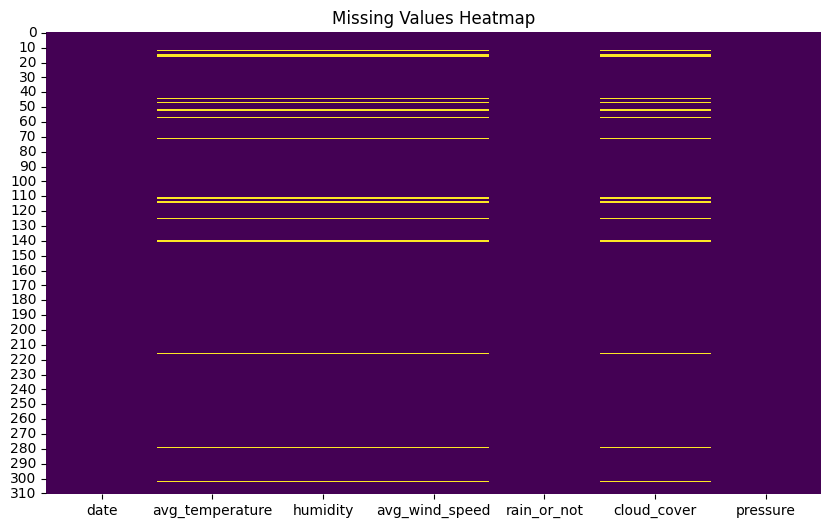

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Let's go with the null value remove approach



In [17]:
# Create a new DataFrame without missing values
df = df.dropna().reset_index(drop=True)

# Display the cleaned dataset info
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             296 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      296 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         296 non-null    float64
dtypes: float64(5), object(2)
memory usage: 16.3+ KB
None


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
291,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
292,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
293,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
294,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


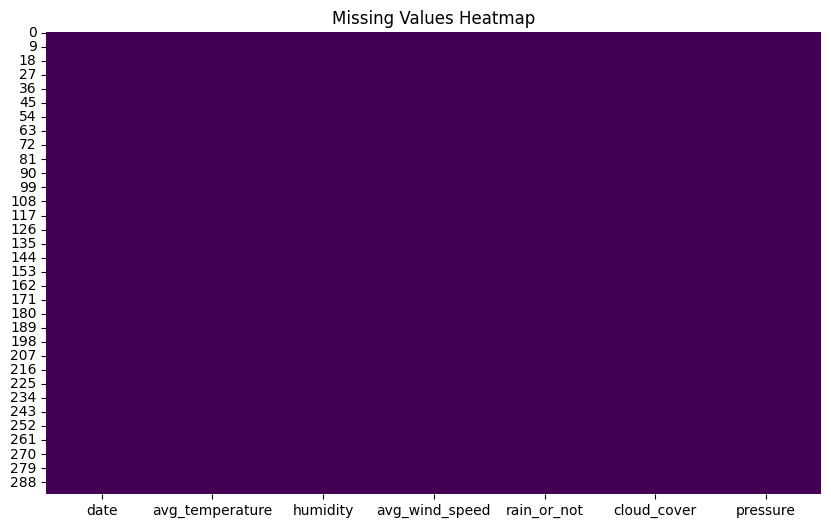

In [18]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 2. Incorrect Entries

In [19]:
df.describe(include='all')

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,296,296.000000,296.000000,296.000000,296,296.000000,296.000000
unique,296,NaN,NaN,NaN,2,NaN,NaN
top,2023-01-01,NaN,NaN,NaN,Rain,NaN,NaN
freq,1,NaN,NaN,NaN,189,NaN,NaN
mean,NaN,25.983840,55.041385,7.556636,NaN,49.834827,1000.954364
std,NaN,6.802475,19.220133,5.344683,NaN,29.009459,29.053359
min,NaN,15.000000,30.000000,0.069480,NaN,0.321826,951.240404
25%,NaN,20.265692,34.280826,3.550354,NaN,24.530951,975.599544
50%,NaN,27.177958,56.759806,7.326421,NaN,50.725120,1001.243321
75%,NaN,32.204599,72.189837,11.050627,NaN,76.046506,1027.247927


### rain_or_not

In [20]:
# Get unique values in the 'rain_or_not' column
unique_values = df['rain_or_not'].unique()

# Display unique values
unique_values

array(['Rain', 'No Rain'], dtype=object)

In [21]:
# Convert 'rain_or_not' to numerical labels
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

# Display the updated DataFrame
df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             296 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      296 non-null    int64  
 5   cloud_cover      296 non-null    float64
 6   pressure         296 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 16.3+ KB


In [23]:
# Count duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Show duplicates (optional)
print(df[df.duplicated()])


Duplicate rows: 0
Empty DataFrame
Columns: [date, avg_temperature, humidity, avg_wind_speed, rain_or_not, cloud_cover, pressure]
Index: []


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             296 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      296 non-null    int64  
 5   cloud_cover      296 non-null    float64
 6   pressure         296 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 16.3+ KB


## 3. Formatting Inconsistencies

In [25]:
# Convert 'date' column to datetime if needed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [26]:
# Check data types
print(df.dtypes)

# Find non-numeric values in numeric columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", df[col].unique())


date               datetime64[ns]
avg_temperature           float64
humidity                  float64
avg_wind_speed            float64
rain_or_not                 int64
cloud_cover               float64
pressure                  float64
dtype: object


# Exploratory Data Analysis

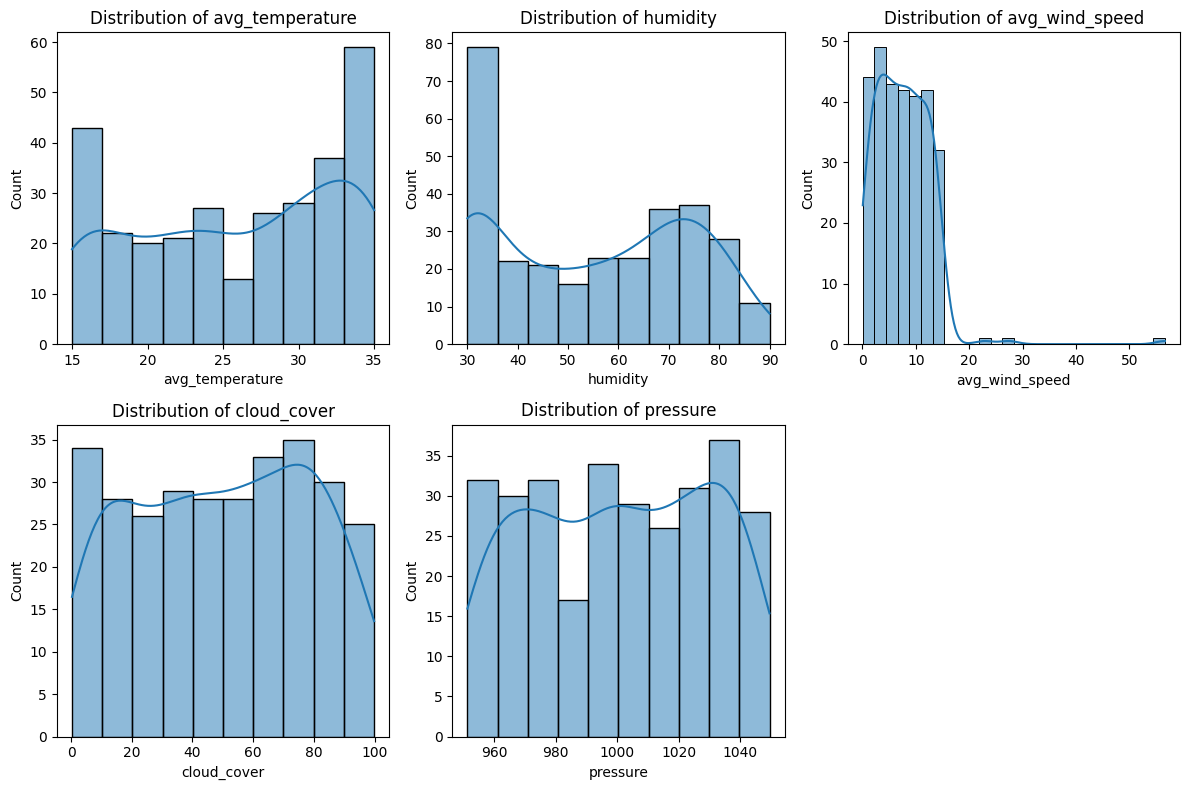

In [27]:
# Visualize distributions of numerical columns
numerical_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


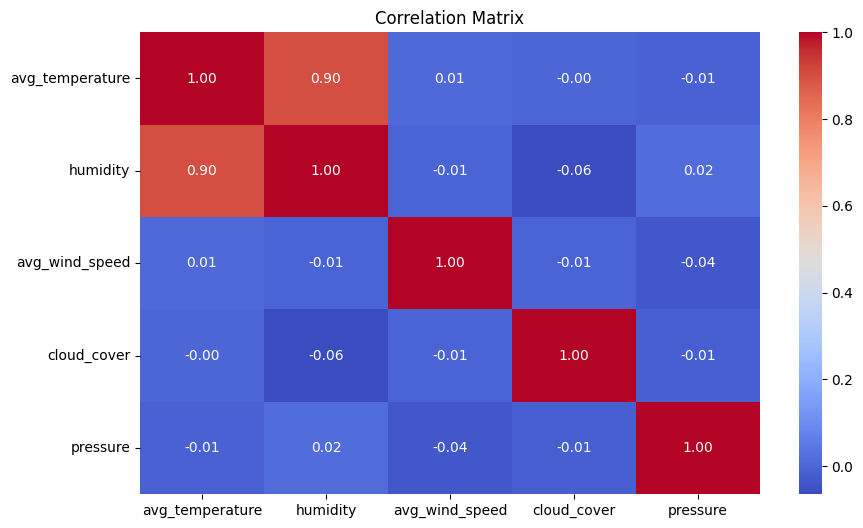

In [28]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


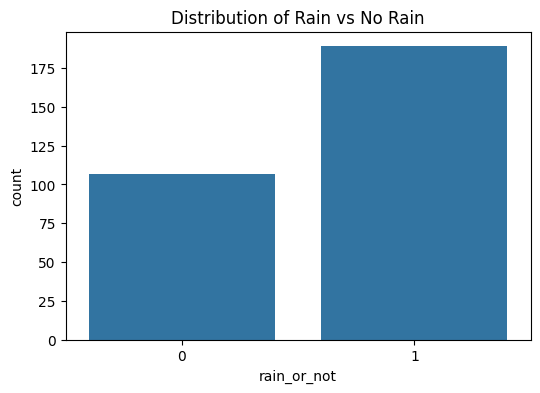

In [29]:
# Countplot for 'rain_or_not'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rain_or_not')
plt.title('Distribution of Rain vs No Rain')
plt.show()


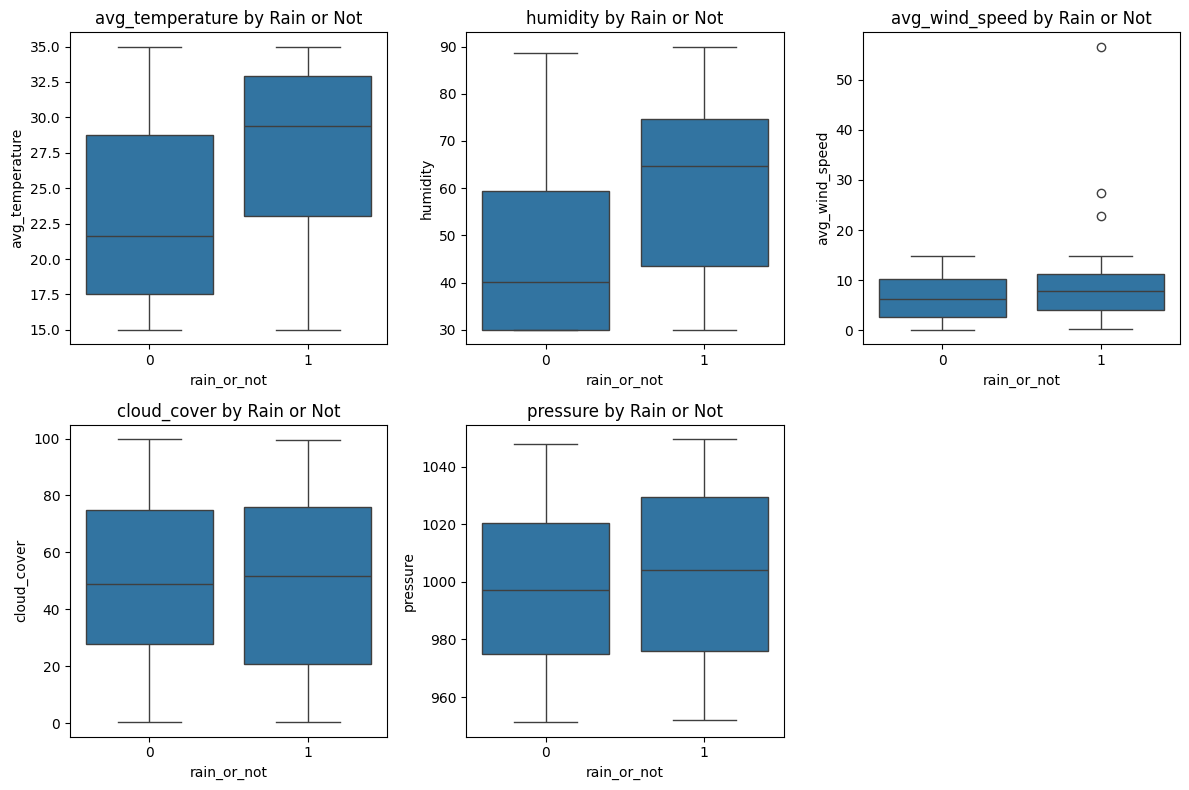

In [30]:
# Boxplots for numerical columns by rain_or_not
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='rain_or_not', y=col)
    plt.title(f'{col} by Rain or Not')
plt.tight_layout()
plt.show()


**Solution for outliers**

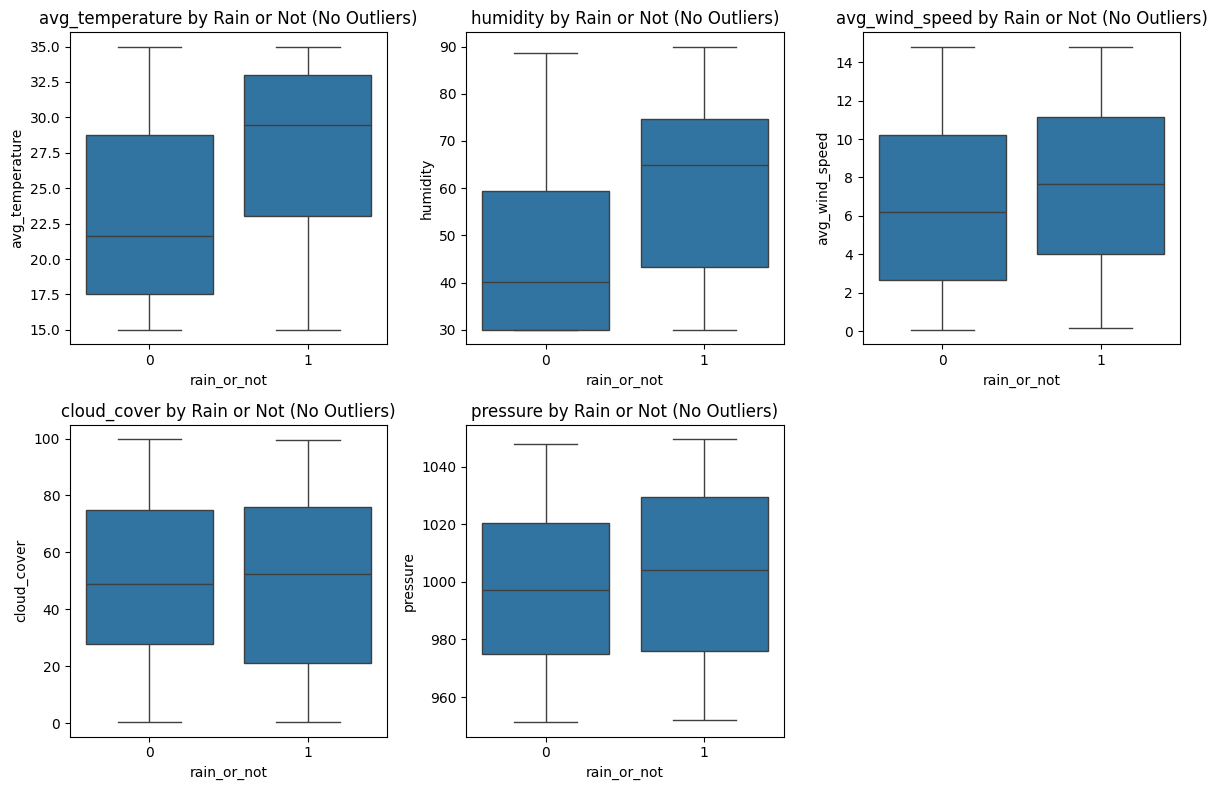

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 295
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             293 non-null    datetime64[ns]
 1   avg_temperature  293 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   293 non-null    float64       
 4   rain_or_not      293 non-null    int64         
 5   cloud_cover      293 non-null    float64       
 6   pressure         293 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 18.3 KB
None


In [31]:
# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        # Calculate the IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define acceptable range (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows that are outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the dataframe
df = remove_outliers(df, numerical_columns)

# Create boxplots after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='rain_or_not', y=col)
    plt.title(f'{col} by Rain or Not (No Outliers)')
plt.tight_layout()
plt.show()

# Display the cleaned dataframe info
print(df.info())


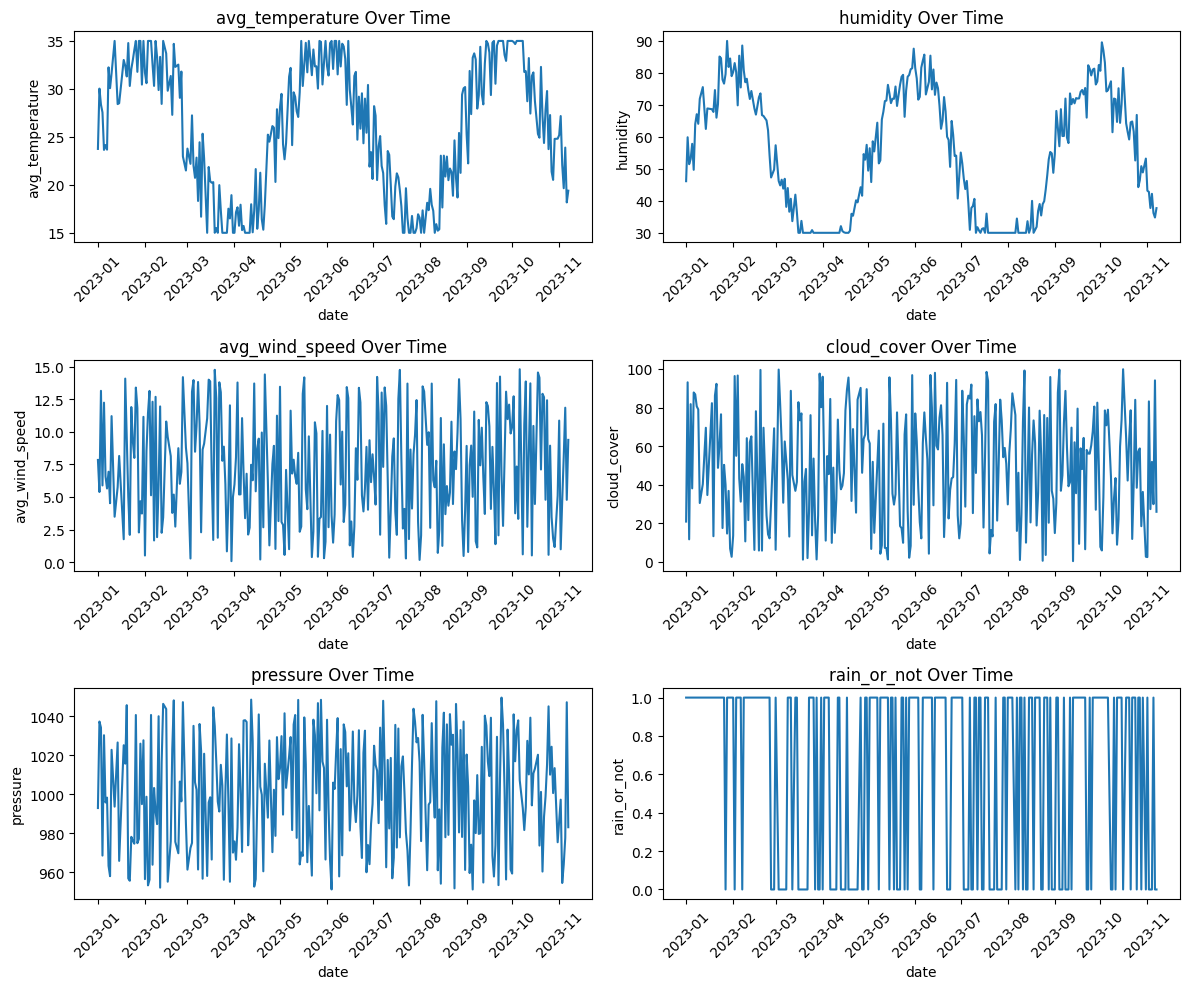

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt



# List of numerical columns
numerical_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure', "rain_or_not"]

# Create time series plots for each numerical column
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=df, x='date', y=col)
    plt.title(f'{col} Over Time')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [33]:
# Group by 'rain_or_not' and get average of numerical columns
grouped_data = df.groupby('rain_or_not')[numerical_columns].mean()
grouped_data


,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,rain_or_not
rain_or_not,,,,,,
0,23.252155,46.617437,6.641547,51.182497,997.780070,0.0
1,27.541875,59.837472,7.630367,49.044281,1002.935935,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 295
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             293 non-null    datetime64[ns]
 1   avg_temperature  293 non-null    float64       
 2   humidity         293 non-null    float64       
 3   avg_wind_speed   293 non-null    float64       
 4   rain_or_not      293 non-null    int64         
 5   cloud_cover      293 non-null    float64       
 6   pressure         293 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 18.3 KB


In [35]:
df.describe()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,293,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,2023-06-07 19:59:10.853242368,25.975322,55.009678,7.269262,0.634812,49.825131,1001.053076
min,2023-01-01 00:00:00,15.000000,30.000000,0.069480,0.000000,0.321826,951.240404
25%,2023-03-25 00:00:00,20.219004,33.730270,3.483190,0.000000,24.667886,975.653006
50%,2023-06-10 00:00:00,27.185586,55.448731,7.140756,1.000000,50.614186,1001.250265
75%,2023-08-23 00:00:00,32.245441,72.393613,10.983373,1.000000,76.028982,1027.387966
max,2023-11-07 00:00:00,35.000000,90.000000,14.815020,1.000000,99.834751,1049.543752
std,NaN,6.828842,19.316020,4.286976,0.482307,28.943908,29.122614


# Model Selection

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dropping 'date' column (it won't be used as a feature)
X = df.drop(columns=['rain_or_not', 'date'])
y = df['rain_or_not']

# Feature scaling for models that require it (like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Logistic Regression Evaluation
Accuracy: 0.711864406779661
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        16
           1       0.81      0.79      0.80        43

    accuracy                           0.71        59
   macro avg       0.64      0.65      0.64        59
weighted avg       0.72      0.71      0.71        59

[[ 8  8]
 [ 9 34]]


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Evaluation
Accuracy: 0.5423728813559322
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        16
           1       0.74      0.58      0.65        43

    accuracy                           0.54        59
   macro avg       0.51      0.51      0.50        59
weighted avg       0.61      0.54      0.57        59

[[ 7  9]
 [18 25]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation
Accuracy: 0.6610169491525424
              precision    recall  f1-score   support

           0       0.39      0.44      0.41        16
           1       0.78      0.74      0.76        43

    accuracy                           0.66        59
   macro avg       0.58      0.59      0.59        59
weighted avg       0.67      0.66      0.67        59

[[ 7  9]
 [11 32]]


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Evaluation
Accuracy: 0.6440677966101694
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        16
           1       0.75      0.77      0.76        43

    accuracy                           0.64        59
   macro avg       0.54      0.54      0.54        59
weighted avg       0.64      0.64      0.64        59

[[ 5 11]
 [10 33]]


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the DNN model
model = Sequential()

# Input layer: the number of neurons equals the number of features
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers: you can experiment with the number of neurons
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer: since it's a binary classification, 1 neuron with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model: using binary_crossentropy for binary classification
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6115 - loss: 0.6724 - val_accuracy: 0.7288 - val_loss: 0.5930
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6708 - loss: 0.5937 - val_accuracy: 0.7119 - val_loss: 0.5808
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7099 - loss: 0.5809 - val_accuracy: 0.6441 - val_loss: 0.6018
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6990 - loss: 0.5779 - val_accuracy: 0.6441 - val_loss: 0.6111
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6849 - loss: 0.5805 - val_accuracy: 0.6949 - val_loss: 0.6038
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7510 - loss: 0.5668 - val_accuracy: 0.6949 - val_loss: 0.6045
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7514 - loss: 0.5441 - val_accuracy: 0.6610 - val_loss: 0.6150
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7098 - loss: 0.5487 - val_accuracy: 0.7288 - val_loss: 0.6151


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6029 - loss: 0.8221
Test Loss: 0.9003120064735413
Test Accuracy: 0.5762711763381958


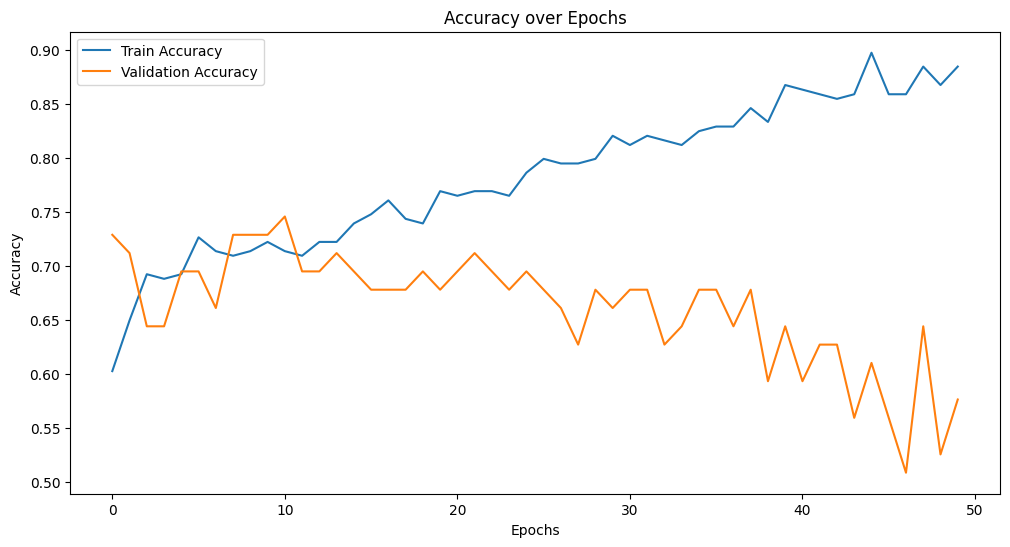

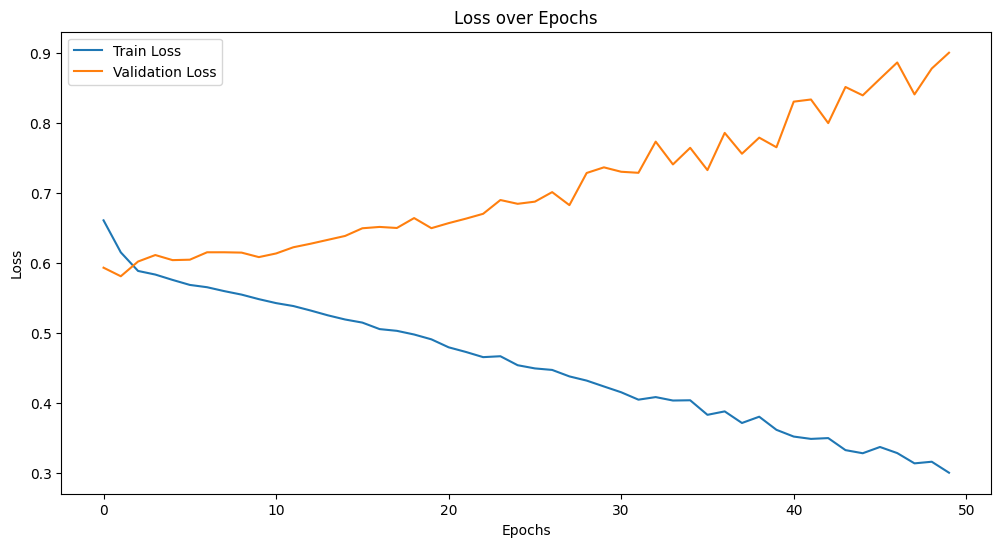

In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plotting training & validation accuracy and loss
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
# Making predictions
y_pred_prob = model.predict(X_test)  # Predicted probabilities

# Convert probabilities to 0 or 1 (if probability >= 0.5, predict 1)
y_pred_dnn = (y_pred_prob >= 0.5).astype(int)

# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dnn))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.25      0.24        16
           1       0.71      0.70      0.71        43

    accuracy                           0.58        59
   macro avg       0.47      0.47      0.47        59
weighted avg       0.58      0.58      0.58        59

Confusion Matrix:
[[ 4 12]
 [13 30]]


In [45]:
# Create a dictionary to store model performance
model_results = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb),
    'DNN': accuracy_score(y_test, y_pred_dnn)
}

# Print out the model comparison
for model, score in model_results.items():
    print(f'{model}: {score}')


Logistic Regression: 0.711864406779661
Decision Tree: 0.5423728813559322
Random Forest: 0.6610169491525424
Gradient Boosting: 0.6440677966101694
DNN: 0.576271186440678


# Hyperparameter Tuning

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # 'saga' works well with large datasets
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)
print("Best Logistic Regression Score:", grid_search_lr.best_score_)


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression Score: 0.6666975023126734


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters and score
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Score:", grid_search_dt.best_score_)


Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Score: 0.6071230342275671


In [48]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Evaluation
Accuracy: 0.6440677966101694
              precision    recall  f1-score   support

           0       0.35      0.38      0.36        16
           1       0.76      0.74      0.75        43

    accuracy                           0.64        59
   macro avg       0.56      0.56      0.56        59
weighted avg       0.65      0.64      0.65        59



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting Score:", grid_search_gb.best_score_)


Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Gradient Boosting Score: 0.6540240518038852


# Feature Engineering

In [52]:
# Extracting meaningful date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # Monday = 0, Sunday = 6
df['weekofyear'] = df['date'].dt.isocalendar().week

# Drop the original 'date' column as it is not needed
df.drop(columns=['date'], inplace=True)


In [53]:
# Temperature-Humidity Interaction (can impact rain)
df['temp_humidity'] = df['avg_temperature'] * df['humidity']

# Wind-Cloud Interaction
df['wind_cloud'] = df['avg_wind_speed'] * df['cloud_cover']

# Pressure-Wind Interaction
df['pressure_wind'] = df['pressure'] / (df['avg_wind_speed'] + 1)  # Avoid division by zero


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure', 'temp_humidity', 'wind_cloud', 'pressure_wind']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


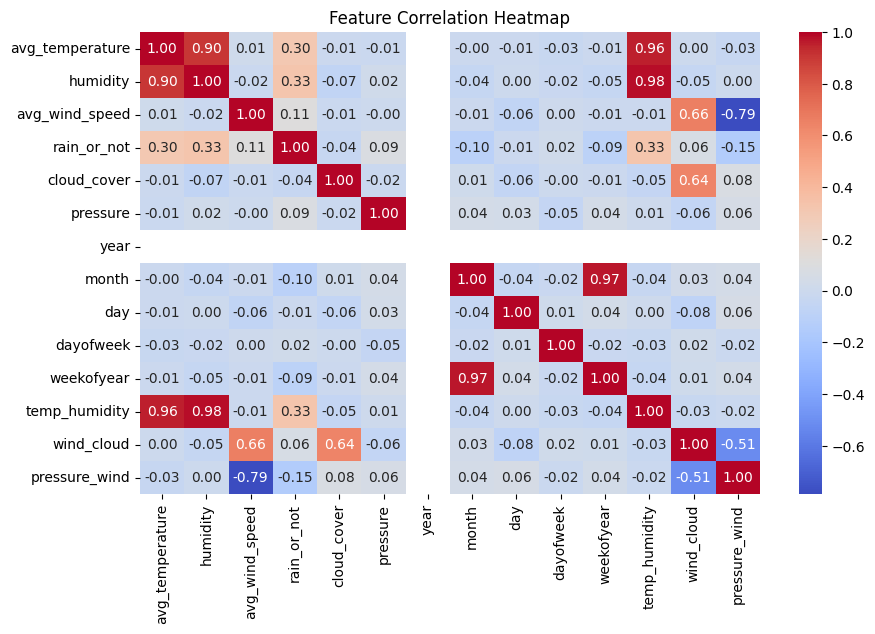

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap to check feature correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


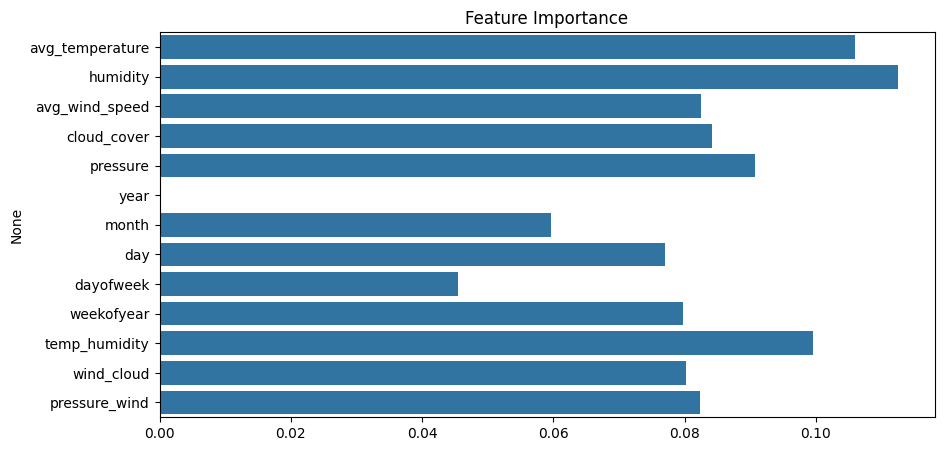

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train a simple model to see feature importance
X = df.drop(columns=['rain_or_not'])
y = df['rain_or_not']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importance
importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()


# Final Training

In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['rain_or_not'])  # All features except target
y = df['rain_or_not']  # Target variable

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")


Logistic Regression Accuracy: 0.6271


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")


Decision Tree Accuracy: 0.4576


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Random Forest Accuracy: 0.5932


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")


Gradient Boosting Accuracy: 0.5763


In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_iter=10, n_jobs=-1, verbose=2)
rf_tuned.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_tuned.best_params_)

# Evaluate optimized model
y_pred_rf_tuned = rf_tuned.best_estimator_.predict(X_test)
rf_tuned_acc = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {rf_tuned_acc:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Tuned Random Forest Accuracy: 0.5763


In [63]:
import tensorflow as tf
from tensorflow import keras

# Define the DNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the model
dnn_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"DNN Accuracy: {dnn_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5270 - loss: 19.6351 - val_accuracy: 0.6271 - val_loss: 2.7150
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5486 - loss: 2.2217 - val_accuracy: 0.3729 - val_loss: 2.3941
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5167 - loss: 2.1043 - val_accuracy: 0.5593 - val_loss: 1.7078
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5358 - loss: 1.5571 - val_accuracy: 0.4915 - val_loss: 1.2897
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5604 - loss: 1.8859 - val_accuracy: 0.5085 - val_loss: 1.1037
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4955 - loss: 1.1402 - val_accuracy: 0.5254 - val_loss: 0.9591
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5646 - loss: 1.1724 - val_accuracy: 0.6271 - val_loss: 1.2866
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5182 - loss: 1.9106 - val_accuracy: 0.4407 - 

In [64]:
models = {
    "Logistic Regression": logreg_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "Tuned Random Forest": rf_tuned_acc,
    "Gradient Boosting": gb_acc,
    "Deep Neural Network": dnn_acc
}

# Print sorted accuracy results
for model, acc in sorted(models.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.6271
Deep Neural Network: 0.5932
Random Forest: 0.5932
Tuned Random Forest: 0.5763
Gradient Boosting: 0.5763
Decision Tree: 0.4576
